 # <center>Titanic Survival Statistics</center>
<center>Available [kaggle.com](https://www.kaggle.com/c/titanic/data)</center>

## Questions:

Although many question *why* the titanic sank, the main question this dataset may help with is **what factors lead to a higher rate of survival for passengers onboard the titanic?**

Factors to inspect from this data set include:
* Class
* Sex
* Age
* Family Onboard
* Ticket #
* Fare
* Destination



## Import Data

In [47]:
import unicodecsv

# Read in CSV file. This definition is provided by Udacity.com, and is the only direct copy of outside code
def read_csv(filename):
    '''Returns a dictionary of the CSV file'''
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

tdata = read_csv('titanic_data.csv')

## Clean Data

In [48]:
def parse_ticket(ticket):
    '''Returns int: the numerical value of the ticket string. Returns "None" if ticket number not at end of string'''
    if ticket == '':
        return None
    else:
        ticket_reverse_split = ticket[::-1].split(' ', 1)
        ticket_num = ticket_reverse_split[0][::-1]
    try:
        return int(ticket_num)
    except:
        return None
    
def parse_int(number):
    '''Returns number string as int. Returns "None" if empty'''
    if number == "":
        return None
    return int(number)
    
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number) 

def parse_string(string):
    '''Returns empty string value as "None"'''
    if string == "":
        return None
    return string

# Clean up data in titanic data table
for data in tdata:
    data['Survived'] = parse_int(data['Survived'])
    data['Pclass'] = parse_int(data['Pclass'])
    data['Age'] = parse_float(data['Age'])
    data['SibSp'] = parse_int(data['SibSp'])
    data['Parch'] = parse_int(data['Parch'])
    data['Ticket'] = parse_ticket(data['Ticket'])
    data['Fare'] = parse_float(data['Fare'])
    data['Cabin'] = parse_string(data['Cabin'])
    data['Embarked'] = parse_string(data['Embarked'])


## Define Universal Functions for Data Analysis

In [49]:
# Define functions for simple analysis of data

def list_maker(data, key, value):
    '''Returns a subset of dataset with desired key value'''
    data_true = []
    for element in data:
        item = []
        if element[key] == value:
            data_true.append(element)
    return data_true

def percent(part, whole):
    '''Returns float percent of part / whole'''
    return float(part)/float(whole)

def get_values(key, value):
    '''Returns 3 values from dataset in form: int(total), int(survivors), percent(float)'''
    key_total = list_maker(tdata, key, value)
    key_surv = list_maker(key_total, "Survived", 1)
    return len(key_total), len(key_surv), percent(len(key_surv), len(key_total))

def print_survival(int_whole, int_part, float_per, string):
    print ("%s Passengers: " + str(int_whole)) % string
    print ("%s Survivors: " + str(int_part)) % string
    print ("Percent %s Survived: " + "%.2f" + "\n") % (string, float_per)

## Sample Total and Percent Survived

In [50]:
# Generate survivor and not_survivor lists
survivors = list_maker(tdata, "Survived", 1)
not_survivors = list_maker(tdata, "Survived", 0)

# Find total number of passengers, survivors, and overall survival percent 
num_total = len(tdata)
num_surv = len(survivors)

# Print overall survival stats
print_survival(num_total, num_surv, percent(num_surv, num_total), "Sample Total")

Sample Total Passengers: 891
Sample Total Survivors: 342
Percent Sample Total Survived: 0.38



## Percent Survivors by Class

In [51]:
# Inspect factor CLASS from key "Pclass"

# Get values for 
num_low, num_surv_low, num_low_per = get_values("Pclass", 3)
num_mid, num_surv_mid, num_mid_per = get_values("Pclass", 2)
num_up, num_surv_up, num_up_per = get_values("Pclass", 1)

# Print survival stats based on Class
print_survival(num_low, num_surv_low, num_low_per, "Lower Class")
print_survival(num_mid, num_surv_mid, num_mid_per, "Middle Class")
print_survival(num_up, num_surv_up, num_up_per, "Upper Class")

Lower Class Passengers: 491
Lower Class Survivors: 119
Percent Lower Class Survived: 0.24

Middle Class Passengers: 184
Middle Class Survivors: 87
Percent Middle Class Survived: 0.47

Upper Class Passengers: 216
Upper Class Survivors: 136
Percent Upper Class Survived: 0.63



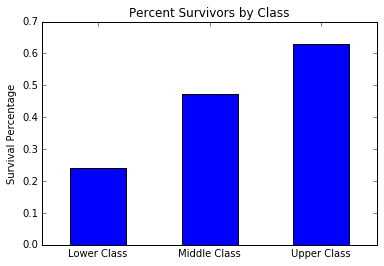

In [52]:
# Graph Percent Survivors by Class

import matplotlib.pyplot as plt
%matplotlib inline

x_values = [1,2,3]
y_values = [num_low_per, num_mid_per, num_up_per]
labels = ["Lower Class", "Middle Class", "Upper Class"]

plt.bar(x_values, y_values, align='center', width=.5)
plt.xticks(x_values, labels)
plt.ylabel("Survival Percentage")
plt.title("Percent Survivors by Class")

plt.show()

## Percent Survivors by Gender

In [53]:
# Inspect factor SEX from key "Sex"

# Get values
num_male, num_male_surv, num_male_per = get_values("Sex", "male")
num_female, num_female_surv, num_female_per = get_values("Sex", "female")

# Print stats 
print_survival(num_male, num_male_surv, num_male_per, "Male")
print_survival(num_female, num_female_surv, num_female_per, "Female")

Male Passengers: 577
Male Survivors: 109
Percent Male Survived: 0.19

Female Passengers: 314
Female Survivors: 233
Percent Female Survived: 0.74



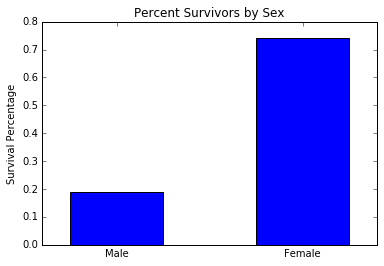

In [54]:
# Graph Percent Survivors by Sex

x_values = [1,2]
y_values = [num_male_per, num_female_per]
labels = ["Male", "Female"]

plt.bar(x_values, y_values, align='center', width=.5)
plt.xticks(x_values, labels)
plt.ylabel("Survival Percentage")
plt.title("Percent Survivors by Sex")

plt.show()

## Percent Survivors by Embarkation

In [56]:
# Inspect factor EMBARKATION from key "Embarked"

# Get values
num_c, num_c_surv, num_c_per = get_values("Embarked", "C")
num_q, num_q_surv, num_q_per = get_values("Embarked", "Q")
num_s, num_s_surv, num_s_per = get_values("Embarked", "S")

# Print Survival Stats for port of Embarked
print_stats(num_c, num_c_surv, num_c_per, "Cherbourg")
print_stats(num_q, num_q_surv, num_q_per, "Queenstown")
print_stats(num_s, num_s_surv, num_s_per, "Southampton")



Cherbourg Passengers: 168
Cherbourg Survivors: 93
Percent Cherbourg Survived: 0.55

Queenstown Passengers: 77
Queenstown Survivors: 30
Percent Queenstown Survived: 0.39

Southampton Passengers: 644
Southampton Survivors: 217
Percent Southampton Survived: 0.34



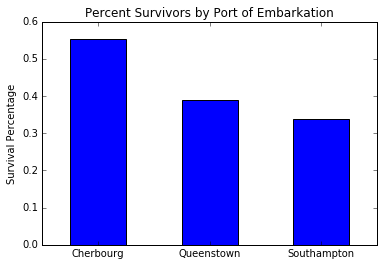

In [57]:
# Graph Percent Survivors by Embarked

x_values = [1,2,3]
y_values = [num_c_per, num_q_per, num_s_per]
labels = ["Cherbourg", "Queenstown", "Southampton"]

plt.bar(x_values, y_values, align='center', width=.5)
plt.xticks(x_values, labels)
plt.ylabel("Survival Percentage")
plt.title("Percent Survivors by Port of Embarkation")

plt.show()